Assignment-Week 6
BITS F464    
Shivam Chadha  
2019B4AA0704G  
Honour Code: I shall be honest in my efforts and will make my parents proud

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.naive_bayes import GaussianNB
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn import datasets
from sklearn.metrics import precision_recall_fscore_support as score
from sklearn.metrics import accuracy_score

## Iris Dataset

a) Iris dataset   
The dataset contains information about 3 related species of flowers from the iris genus. The species are Iris setosa, Iris virginica and Iris versicolor. It contains information of the physical features of the flower.  
It is a small dataset containing 150 instances.  
For Multiclass classification.  
  
  
b)  Features  
It has 4 features and 3 labels

The 4 features are
* Sepal Length
* Sepal Width
* Petal Length 
* Petal Width.

The 3 types of iris flowers are
* Setosa
* Versicolour
* Virginica

In [ ]:
# getting data
iris = datasets.load_iris()
X = iris.data  
y = iris.target
iris.feature_names # features

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

c)  3-classes

In [ ]:
iris.target_names # targets

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

d) Distribution

In [ ]:
df = pd.DataFrame(columns = ['Iris_Species','Data_Instances'])
df.Iris_Species = iris.target_names
df.Data_Instances = [50,50,50]
df

,Iris_Species,Data_Instances
0,setosa,50
1,versicolor,50
2,virginica,50


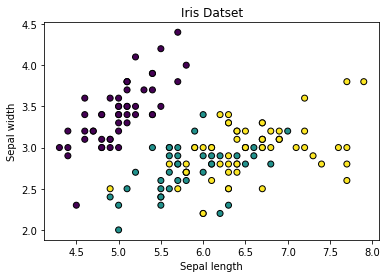

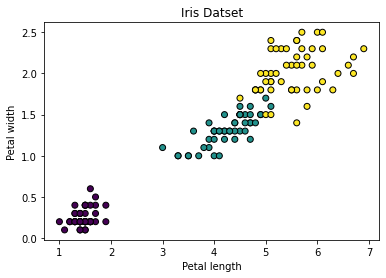

In [ ]:
plt.figure(1)
plt.scatter(X[:, 0], X[:, 1], c=y,edgecolor="k")
plt.xlabel("Sepal length")
plt.ylabel("Sepal width")
plt.title('Iris Datset');

plt.figure(2)
plt.scatter(X[:, 2], X[:, 3], c=y, edgecolor="k")
plt.xlabel("Petal length")
plt.ylabel("Petal width")
plt.title('Iris Datset');

e) Split to Train-Test

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

f) Train-Test distribution

In [ ]:
df1 = pd.DataFrame(columns = ['Iris_Species','Train','Test'])
df1.Iris_Species = iris.target_names
df1.Train = np.unique(y_train,return_counts=True)[1]
df1.Test = np.unique(y_test,return_counts=True)[1]
df1

,Iris_Species,Train,Test
0,setosa,40,10
1,versicolor,41,9
2,virginica,39,11


g) 
### PCA

In [ ]:
X_centered = X_train - X_train.mean(0)

covx = np.dot(X_centered.T,X_centered)/(X_centered.shape[0]-1)

eigval,V = np.linalg.eig(covx)

evals = np.diag(eigval)

eigvec = V[:,eigval.argsort()[-1::-1]]
evec = eigvec[:,:2] # Using 2 out of 4 dimensions
X_pca = np.dot(X_centered,evec)

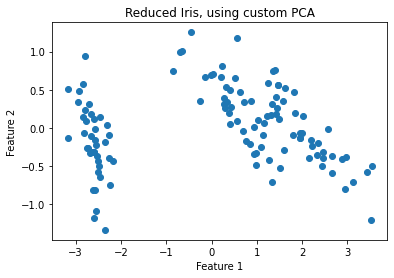

In [ ]:
plt.scatter(X_pca[:,0],X_pca[:,1])
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title('Reduced Iris, using custom PCA');

h) Test set reduction

In [ ]:
X_pca_t = np.dot(X_test-X_train.mean(0),evec)  # for test using train params

i)
### Gaussian Naive Bayes
Referred from : https://www.kaggle.com/code/gautigadu091/gaussian-naive-bayes-from-scratch-in-python

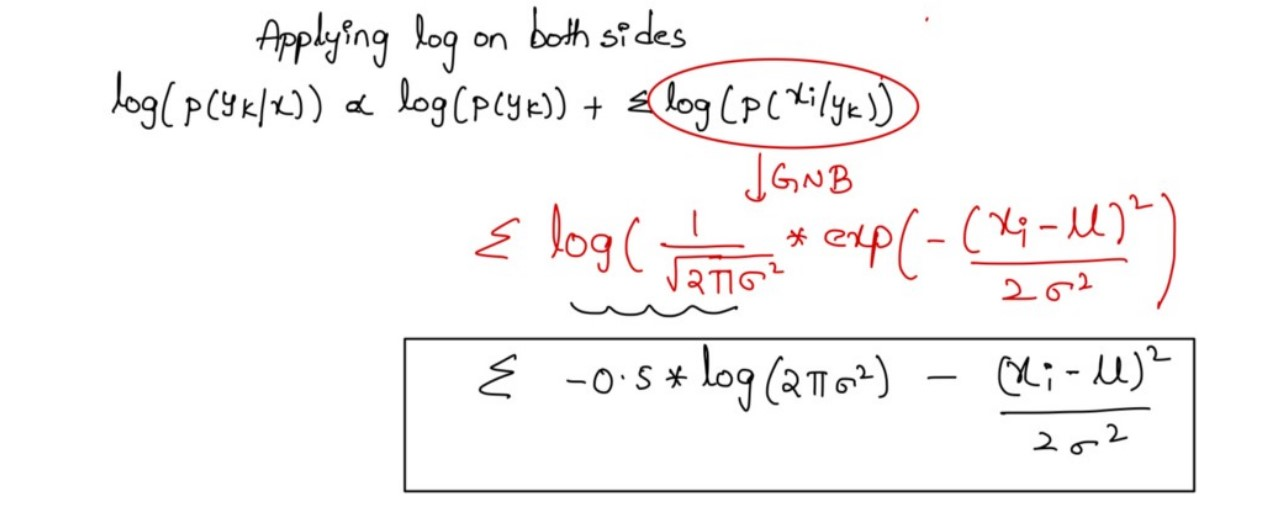

So we choose the maximum score from the last formula.  

In [ ]:
def class_params(X,y):
    # retruns the params of the data for each unique class
    n_classes = np.unique(y).shape[0]
    mean = []
    var = []
    count = []
    for j in range(n_classes):
        index = y==j
        X_feature = X[index]
        mean.append(np.mean(X_feature,axis = 0))
        var.append(np.var(X_feature,axis = 0))
        # Appending the class count for calculating prior probabilities
        count.append(sum(index))
        
    return mean,var,count

In [ ]:
mean,var,count = class_params(X_pca,y_train)

In [ ]:
def GNB(X, mean,var,count,classes):
    # Custom model, using the formula given above
    probs = []
    for x in X:
        x_probs = []
        for i in range(classes):

            mu = mean[i]
            sigma = var[i]
            
            log_li = -0.5*(np.log(2*np.pi*sigma))  - 0.5*((x-mu)**2)/sigma  
            prior_prob = np.log(count[i]/sum(count))
            x_probs.append(log_li.sum() + prior_prob)   # Appending final Score
        probs.append(x_probs)
    y_pred = np.argmax(probs,1)
    return y_pred

In [ ]:
y_pred_t = GNB(X_pca,mean,var,count,3)
y_pred = GNB(X_pca_t,mean,var,count,3)

In [ ]:
print('Accuracy of custom Guassian Naive Bayes on reduced Iris test set: \n',accuracy_score(y_test,y_pred))

Accuracy of custom Guassian Naive Bayes on reduced Iris test set: 
 0.9333333333333333


j) 
### Custom Results

In [ ]:
train_acc = accuracy_score(y_train,y_pred_t) 
acc = accuracy_score(y_test,y_pred)

precision_t, recall_t, fscore_t,_ = score(y_train,y_pred_t,average = 'macro')
precision, recall, fscore,_ = score(y_test,y_pred,average = 'macro')

scores = pd.DataFrame( columns = ['metric','Train','Test'])
scores.metric =  ['Accuarcy','Precision','Recall','F1']
scores.Train = [train_acc,precision_t, recall_t, fscore_t]
scores.Test = [acc,precision, recall, fscore]
scores

,metric,Train,Test
0,Accuarcy,0.900000,0.933333
1,Precision,0.902646,0.932660
2,Recall,0.899104,0.932660
3,F1,0.899434,0.932660


k)
### Package Results

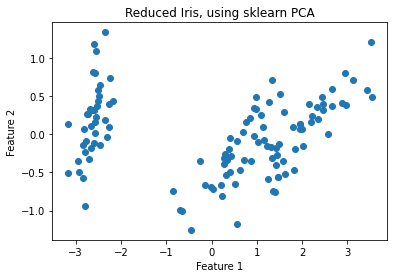

In [ ]:
pca = PCA(n_components=2)
X_pca1 = pca.fit_transform(X_train)
Xt_pca1 = pca.transform(X_test)
plt.scatter(X_pca1[:,0],X_pca1[:,1])
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title('Reduced Iris, using sklearn PCA');

In [ ]:
gnb = GaussianNB()
gnb.fit(X_pca1,y_train); 
y_pred_train1 = gnb.predict(X_pca1)  
y_pred1 = gnb.predict(Xt_pca1)   # test predictions
train_acc1 = gnb.score(X_pca1,y_train)  # train predictions
acc1 = gnb.score(Xt_pca1,y_test)

In [ ]:
precision_t1, recall_t1, fscore_t1,_ = score(y_train,y_pred_train1,average = 'macro')
precision1, recall1, fscore1,_ = score(y_test,y_pred1,average = 'macro')
scores1 = pd.DataFrame( columns = ['metric','Train','Test'])
scores1.metric =  ['Accuarcy','Precision','Recall','F1']
scores1.Train = [train_acc1,precision_t1, recall_t1, fscore_t1]
scores1.Test = [acc1,precision1, recall1, fscore1]
scores1

,metric,Train,Test
0,Accuarcy,0.900000,0.933333
1,Precision,0.902646,0.932660
2,Recall,0.899104,0.932660
3,F1,0.899434,0.932660


As we can see the results are same as the custom built model.  
But sklearn gives rotated eigen-vectors so the data does not match correctly but the information is same.  
We can also notice that the sklearn redued Iris Data is a mirror image of our custom reduced plot.